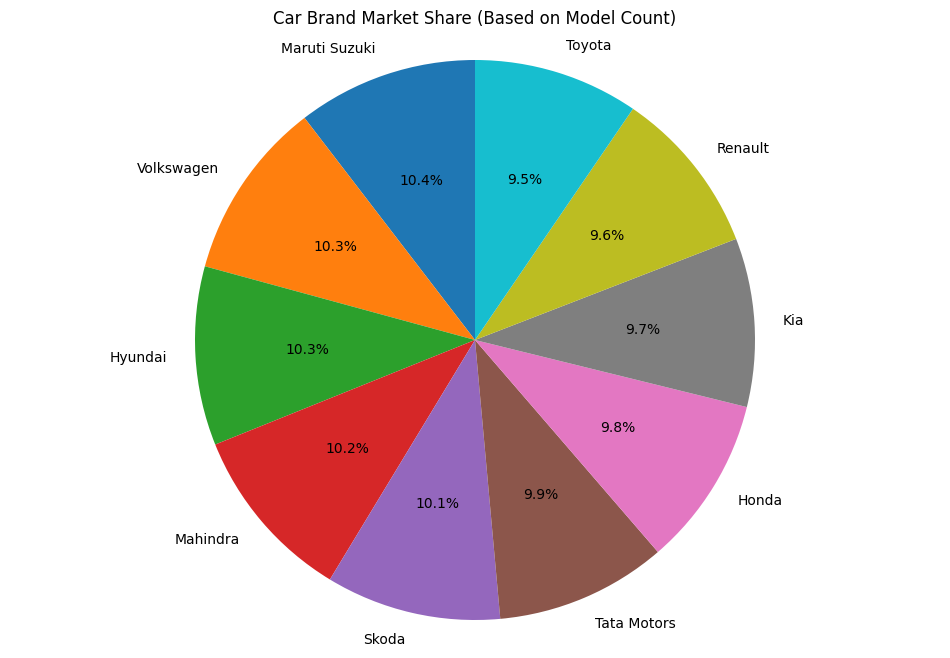

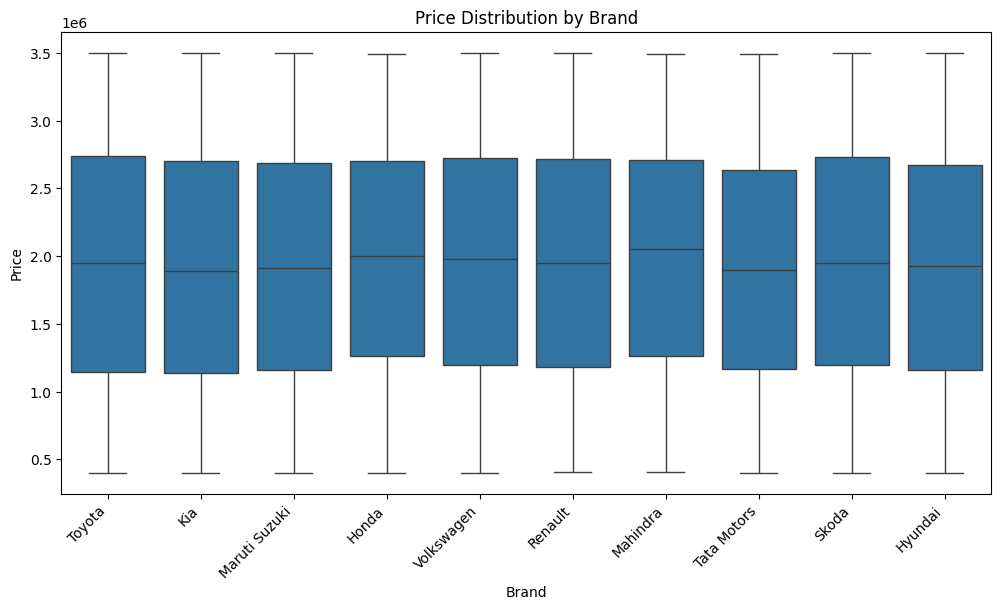

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('car_dataset_india.csv')
except FileNotFoundError:
    print("Error: 'car_dataset_india.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    exit()


# Group by brand and count models
brand_counts = df.groupby('Brand')['Model'].count().reset_index()
brand_counts.rename(columns={'Model': 'Model_Count'}, inplace=True)

# Calculate market share percentage
brand_counts['Market_Share'] = (brand_counts['Model_Count'] / brand_counts['Model_Count'].sum()) * 100

# Sort by market share
brand_counts = brand_counts.sort_values('Market_Share', ascending=False)


# Create pie chart
plt.figure(figsize=(12, 8))
plt.pie(brand_counts['Market_Share'], labels=brand_counts['Brand'], autopct='%1.1f%%', startangle=90)
plt.title('Car Brand Market Share (Based on Model Count)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Price distribution analysis (optional, add more detailed analysis here)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


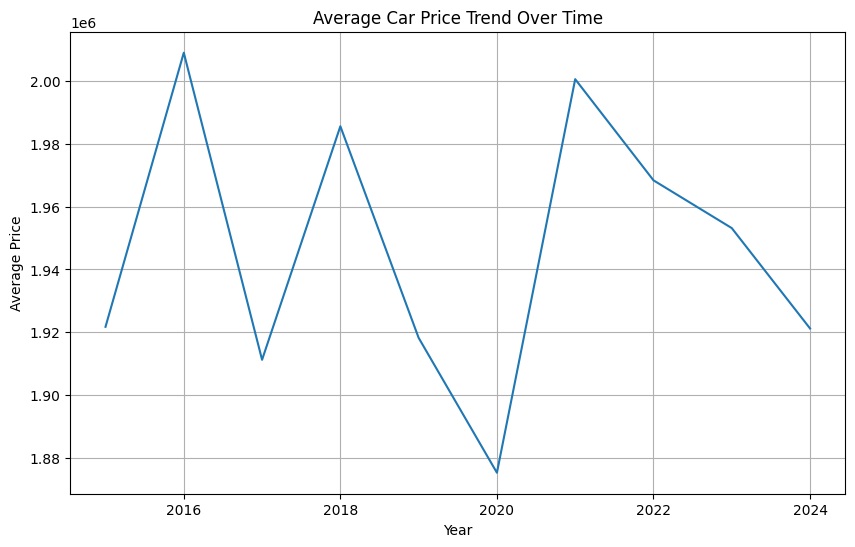

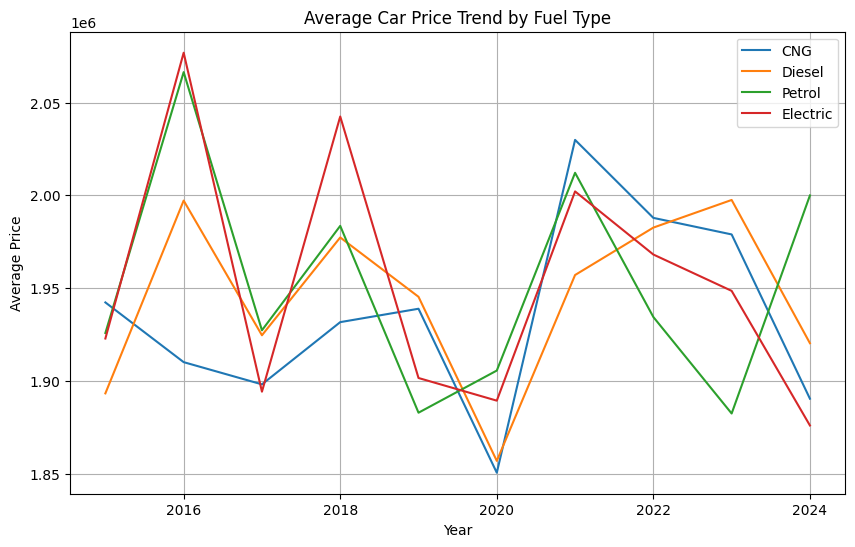

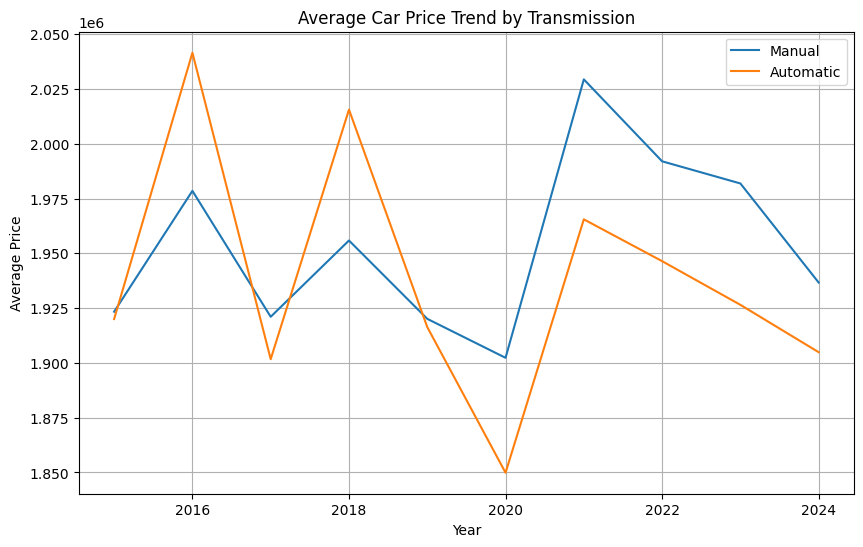

In [ ]:

import matplotlib.pyplot as plt
# Calculate average price per year
average_price_per_year = df.groupby('Year').agg({'Price': 'mean'})

# Plot the average price trend over time
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year.index, average_price_per_year['Price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Car Price Trend Over Time')
plt.grid(True)
plt.show()

# Compare price trends for different Fuel_Type
plt.figure(figsize=(10, 6))
for fuel_type in df['Fuel_Type'].unique():
    subset = df[df['Fuel_Type'] == fuel_type]
    average_price_by_year = subset.groupby('Year')['Price'].mean()
    plt.plot(average_price_by_year.index, average_price_by_year.values, label=fuel_type)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Car Price Trend by Fuel Type')
plt.legend()
plt.grid(True)
plt.show()


# Compare price trends for different Transmission
plt.figure(figsize=(10, 6))
for transmission_type in df['Transmission'].unique():
    subset = df[df['Transmission'] == transmission_type]
    average_price_by_year = subset.groupby('Year')['Price'].mean()
    plt.plot(average_price_by_year.index, average_price_by_year.values, label=transmission_type)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Car Price Trend by Transmission')
plt.legend()
plt.grid(True)
plt.show()


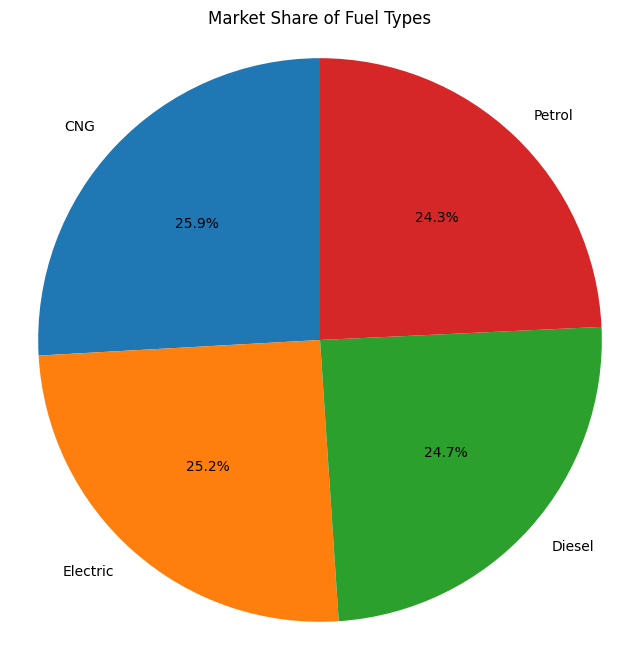

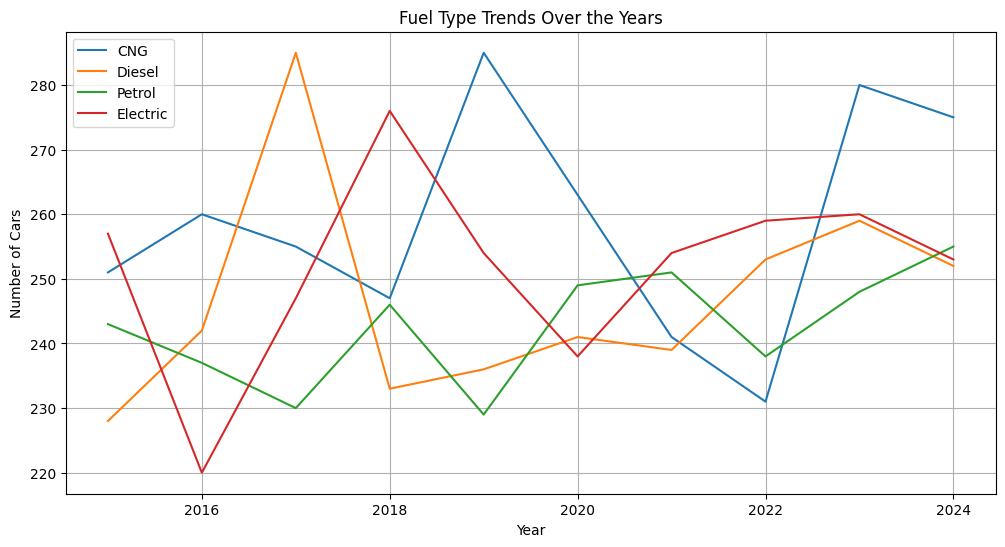

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('car_dataset_india.csv')
except FileNotFoundError:
    print("Error: 'car_dataset_india.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    exit()

# Count the number of cars for each Fuel_Type
fuel_type_counts = df['Fuel_Type'].value_counts()

# Calculate percentages
fuel_type_percentages = (fuel_type_counts / fuel_type_counts.sum()) * 100

# Visualize the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_percentages, labels=fuel_type_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Market Share of Fuel Types')
plt.axis('equal')
plt.show()

# Check fuel type trends over the years
plt.figure(figsize=(12, 6))
for fuel_type in df['Fuel_Type'].unique():
    fuel_type_df = df[df['Fuel_Type'] == fuel_type]
    fuel_type_counts_per_year = fuel_type_df.groupby('Year')['Fuel_Type'].count()
    plt.plot(fuel_type_counts_per_year.index, fuel_type_counts_per_year.values, label=fuel_type)

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Fuel Type Trends Over the Years')
plt.legend()
plt.grid(True)
plt.show()


Transmission
Manual       5045
Automatic    4955
Name: count, dtype: int64


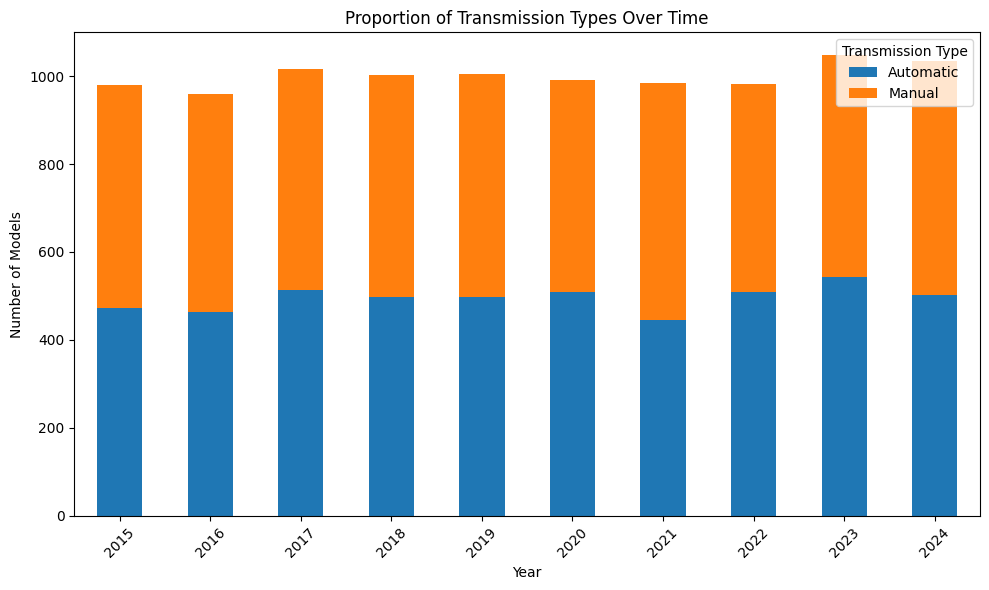

In [ ]:

import matplotlib.pyplot as plt
# Count the number of models for each transmission type
transmission_counts = df['Transmission'].value_counts()
print(transmission_counts)

# Group data by year and transmission type, then count occurrences
transmission_trend = df.groupby(['Year', 'Transmission'])['Model'].count().unstack()

# Create the stacked bar chart
transmission_trend.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Transmission Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()


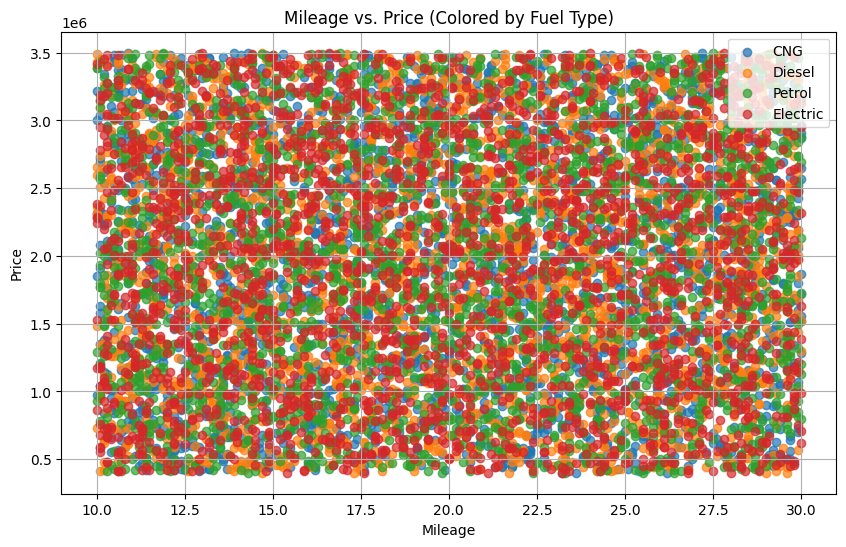

Regression Equation: Price = 1959.02 * Mileage + 1906947.72


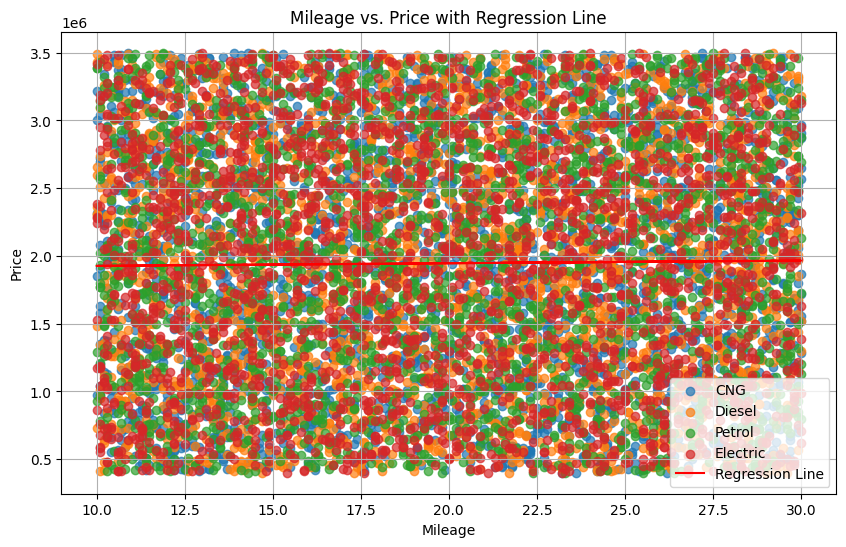

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset (assuming it's already loaded in the previous code)
try:
    df = pd.read_csv('car_dataset_india.csv')
except FileNotFoundError:
    print("Error: 'car_dataset_india.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    exit()

# Create the scatter plot with points differentiated by Fuel_Type
plt.figure(figsize=(10, 6))
for fuel_type in df['Fuel_Type'].unique():
    subset = df[df['Fuel_Type'] == fuel_type]
    plt.scatter(subset['Mileage'], subset['Price'], label=fuel_type, alpha=0.7)  # alpha for transparency

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price (Colored by Fuel Type)')
plt.legend()
plt.grid(True)
plt.show()

# Regression analysis
# Prepare the data for regression
X = df[['Mileage']]  # Independent variable
y = df['Price']      # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression equation
print(f"Regression Equation: Price = {slope:.2f} * Mileage + {intercept:.2f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
for fuel_type in df['Fuel_Type'].unique():
    subset = df[df['Fuel_Type'] == fuel_type]
    plt.scatter(subset['Mileage'], subset['Price'], label=fuel_type, alpha=0.7)

plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot the regression line

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


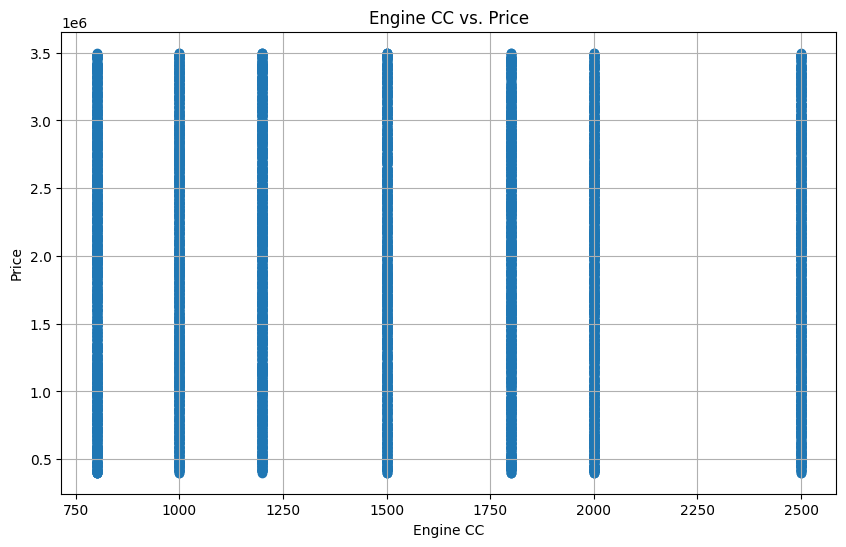

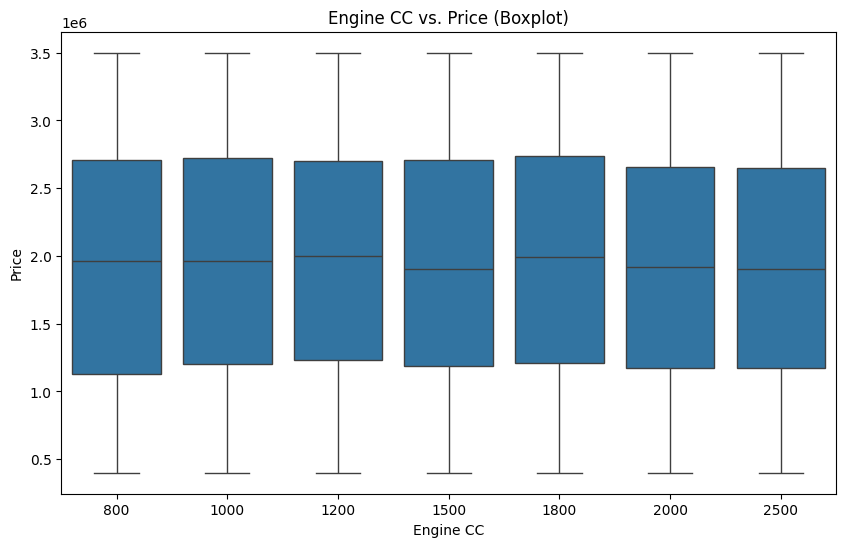

Engine_CC                 Price           
                                mean  median          mean     median
Brand         Fuel_Type                                              
Honda         CNG        1536.032389  1500.0  1.888988e+06  1860000.0
              Diesel     1525.514403  1500.0  1.905967e+06  1920000.0
              Electric   1608.267717  1800.0  2.063110e+06  2090000.0
              Petrol     1532.773109  1500.0  2.029034e+06  2020000.0
Hyundai       CNG        1595.306859  1500.0  1.986679e+06  1970000.0
              Diesel     1560.919540  1500.0  1.913870e+06  1920000.0
              Electric   1549.011858  1500.0  1.951581e+06  2010000.0
              Petrol     1462.396694  1500.0  1.871033e+06  1760000.0
Kia           CNG        1538.114754  1500.0  1.976598e+06  2015000.0
              Diesel     1516.412214  1500.0  1.861947e+06  1835000.0
              Electric   1517.004049  1500.0  1.815789e+06  1810000.0
              Petrol     1522.727273  1500.0  2.031455e+06  2080000.0
Mahindra      CNG        1492.635659  1500.0  1.972558e+06  1980000.0
              Diesel     1593.410853  1500.0  1.989922e+06  2050000.0
              Electric   1539.312977  1500.0  1.914198e+06  1940000.0
              Petrol     1542.276423  1500.0  2.115732e+06  2195000.0
Maruti Suzuki CNG        1572.101449  1500.0  1.952609e+06  2000000.0
              Diesel     1546.825397  1500.0  1.954603e+06  1940000.0
              Electric   1501.111111  1500.0  1.911259e+06  1850000.0
              Petrol     1543.442623  1500.0  1.847787e+06  1835000.0
Renault       CNG        1536.134454  1500.0  1.960714e+06  1935000.0
              Diesel     1527.235772  1500.0  1.945447e+06  1945000.0
              Electric   1590.717300  1500.0  1.950549e+06  1980000.0
              Petrol     1529.957806  1500.0  1.946582e+06  1950000.0
Skoda         CNG        1556.692913  1500.0  1.897874e+06  1910000.0
              Diesel     1544.017094  1500.0  2.070940e+06  2050000.0
              Electric   1568.888889  1500.0  1.936519e+06  1890000.0
              Petrol     1538.735178  1500.0  1.928735e+06  1920000.0
Tata Motors   CNG        1527.756654  1500.0  1.897490e+06  1880000.0
              Diesel     1523.949580  1500.0  1.976807e+06  1980000.0
              Electric   1569.090909  1500.0  1.920909e+06  1935000.0
              Petrol     1564.179104  1500.0  1.876866e+06  1845000.0
Toyota        CNG        1567.063492  1500.0  1.852381e+06  1825000.0
              Diesel     1511.607143  1500.0  1.983170e+06  2020000.0
              Electric   1523.015873  1500.0  2.082262e+06  2175000.0
              Petrol     1534.513274  1500.0  1.834381e+06  1795000.0
Volkswagen    CNG        1545.161290  1500.0  1.955269e+06  1920000.0
              Diesel     1516.800000  1500.0  1.868880e+06  1805000.0
              Electric   1527.667984  1500.0  1.971028e+06  1900000.0
              Petrol     1567.857143  1500.0  2.048294e+06  2140000.0

In [ ]:

import matplotlib.pyplot as plt
# Assuming df is already loaded from 'car_dataset_india.csv' as in the provided code.

# Plot a scatter plot of Engine_CC vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine_CC'], df['Price'])
plt.xlabel('Engine CC')
plt.ylabel('Price')
plt.title('Engine CC vs. Price')
plt.grid(True)
plt.show()

# Create a boxplot of Engine_CC vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Engine_CC'], y=df['Price'])
plt.xlabel('Engine CC')
plt.ylabel('Price')
plt.title('Engine CC vs. Price (Boxplot)')
plt.show()

# Group by Brand and Fuel_Type
grouped_data = df.groupby(['Brand', 'Fuel_Type'])[['Engine_CC', 'Price']].agg(['mean', 'median'])
grouped_data


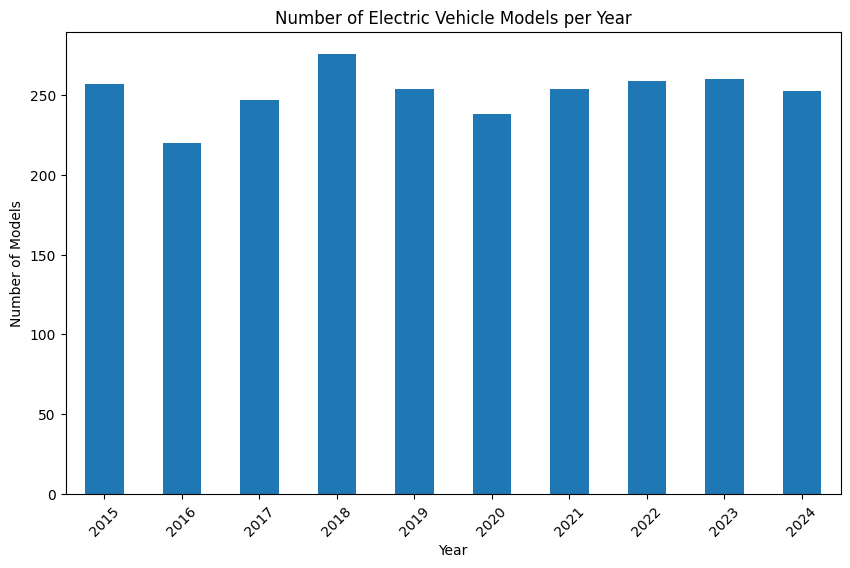

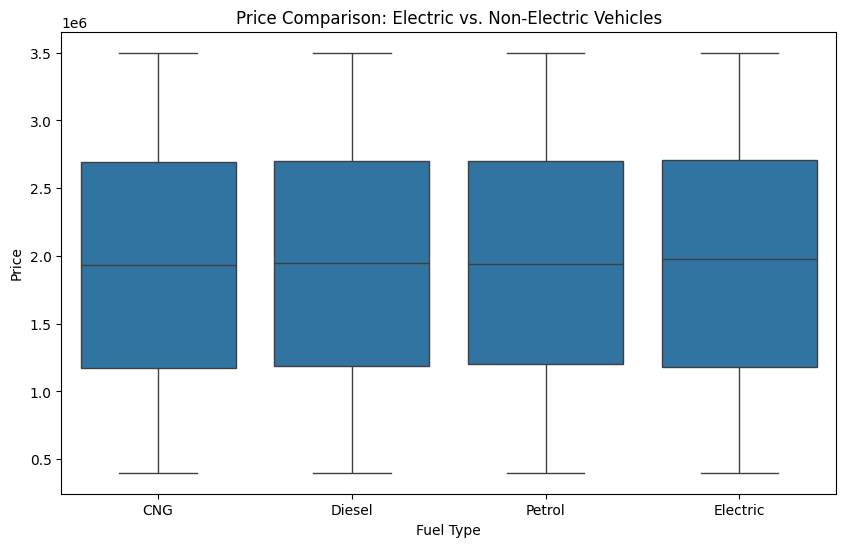

In [ ]:

import matplotlib.pyplot as plt
# Filter for Electric vehicles
electric_vehicles = df[df['Fuel_Type'] == 'Electric']

# Count EV models by year
ev_models_by_year = electric_vehicles.groupby('Year')['Model'].count()

# Create bar chart
plt.figure(figsize=(10, 6))
ev_models_by_year.plot(kind='bar')
plt.title('Number of Electric Vehicle Models per Year')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()


# Compare Electric vs. Non-Electric Vehicle Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price Comparison: Electric vs. Non-Electric Vehicles')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


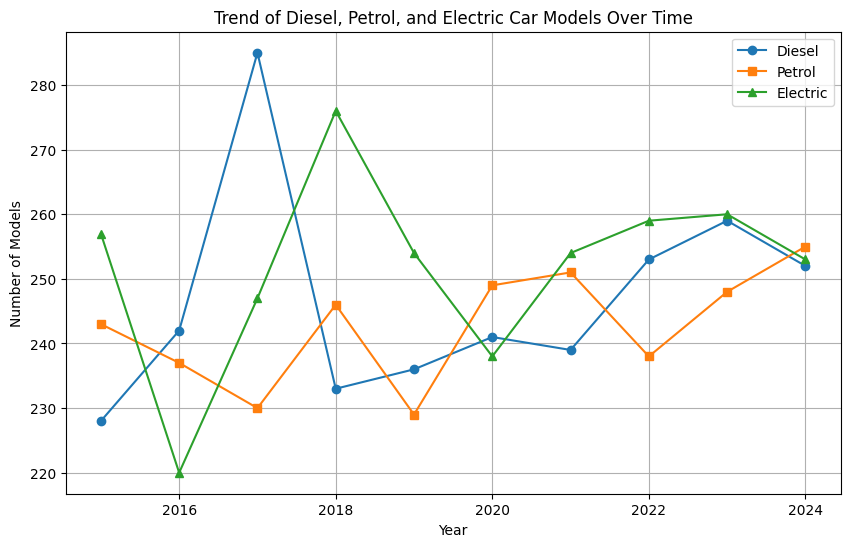

In [ ]:

import matplotlib.pyplot as plt
# Assuming df is already loaded from 'car_dataset_india.csv' as in the provided code.

# Group by 'Year' and 'Fuel_Type', then count the occurrences of 'Model'
diesel_trend = df[df['Fuel_Type'] == 'Diesel'].groupby('Year')['Model'].count()
petrol_trend = df[df['Fuel_Type'] == 'Petrol'].groupby('Year')['Model'].count()
ev_trend = df[df['Fuel_Type'] == 'Electric'].groupby('Year')['Model'].count()


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(diesel_trend.index, diesel_trend.values, label='Diesel', marker='o')
plt.plot(petrol_trend.index, petrol_trend.values, label='Petrol', marker='s')
plt.plot(ev_trend.index, ev_trend.values, label='Electric', marker='^')

plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.title('Trend of Diesel, Petrol, and Electric Car Models Over Time')
plt.legend()
plt.grid(True)
plt.show()


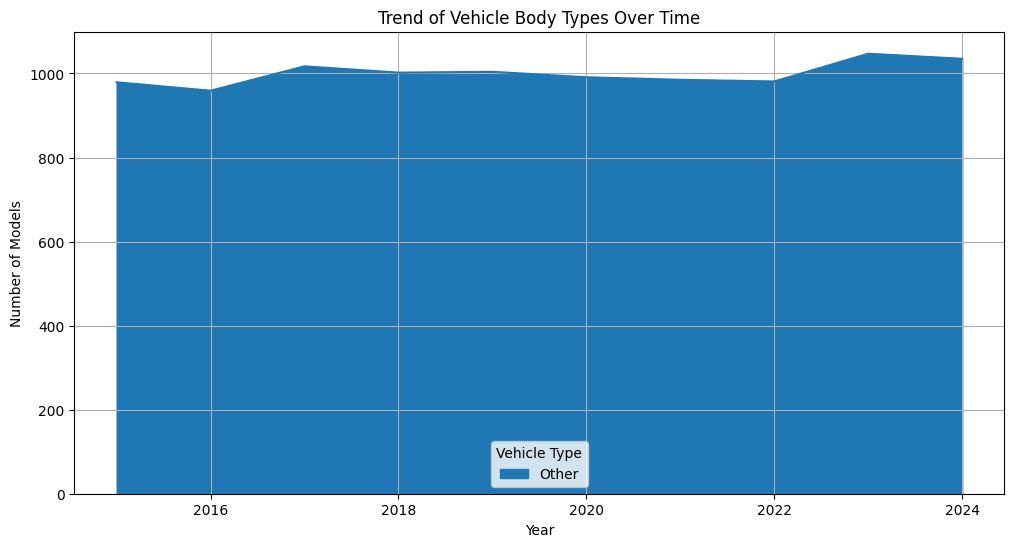

In [ ]:
 
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded as 'df' in your existing code)
try:
    df = pd.read_csv('car_dataset_india.csv')
except FileNotFoundError:
    print("Error: 'car_dataset_india.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    exit()

# Function to categorize vehicle types based on model names
def categorize_vehicle_type(model):
    model = str(model).lower()  # Convert to lowercase for case-insensitive matching
    if 'suv' in model or 'sport utility' in model:
        return 'SUV'
    elif 'sedan' in model:
        return 'Sedan'
    elif 'hatchback' in model:
        return 'Hatchback'
    elif 'mpv' in model or 'multi purpose' in model:
        return 'MPV'
    # Add more categories as needed
    else:
        return 'Other'

# Apply the categorization function to the 'Model' column
df['Vehicle_Type'] = df['Model'].apply(categorize_vehicle_type)

# Group by year and vehicle type, then count occurrences
vehicle_type_trend = df.groupby(['Year', 'Vehicle_Type'])['Model'].count().unstack()

# Fill NaN values with 0 for better visualization
vehicle_type_trend = vehicle_type_trend.fillna(0)


# Create the stacked area chart
vehicle_type_trend.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Trend of Vehicle Body Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()


Brand
Honda            14644.704684
Hyundai          14711.519845
Kia              15008.221994
Mahindra         15027.050781
Maruti Suzuki    15094.433781
Renault          15218.267223
Skoda            14957.171118
Tata Motors      14983.417594
Toyota           15065.932914
Volkswagen       14992.069632
Name: Service_Cost, dtype: float64
Transmission     Automatic        Manual
Fuel_Type                               
CNG           14984.340223  14835.413534
Diesel        14934.281201  15192.013311
Electric      15033.544806  14950.755768
Petrol        14921.794872  14915.127389


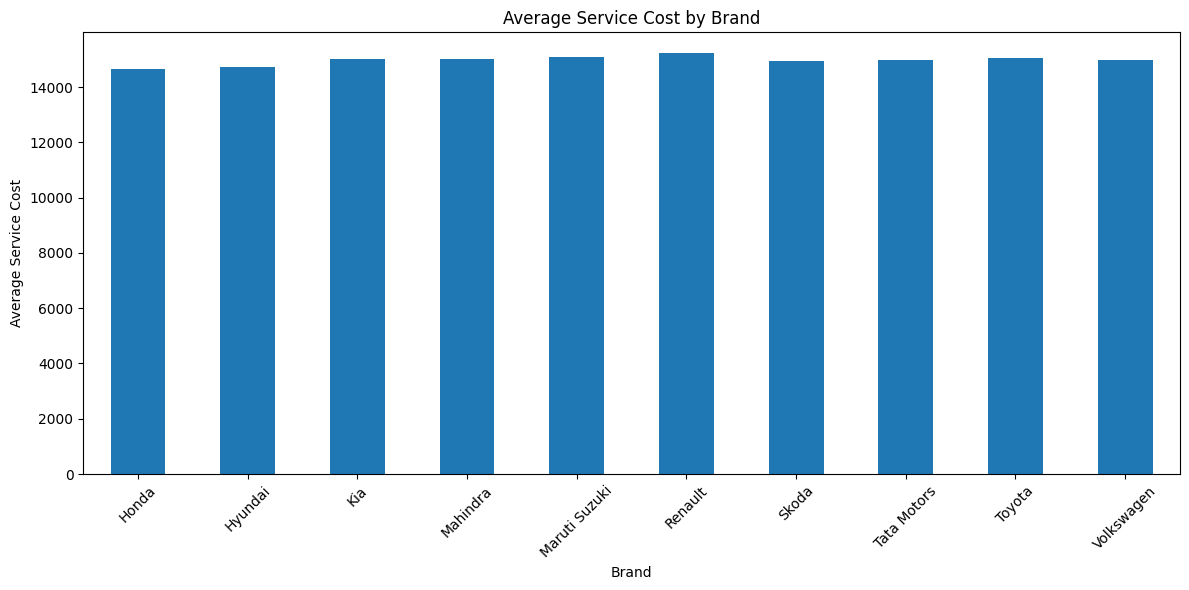

<Figure size 1000x600 with 0 Axes>

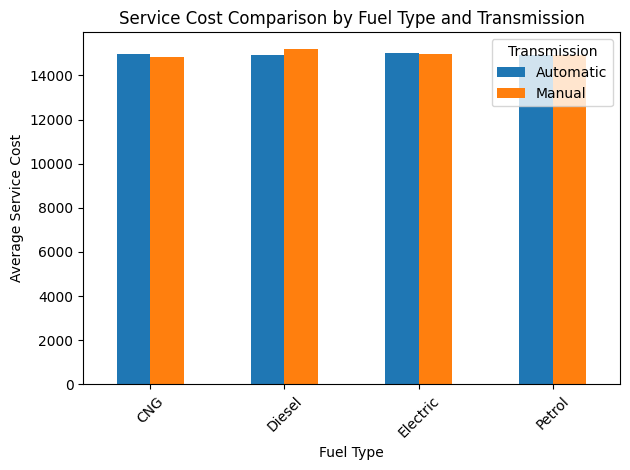

In [ ]:

import matplotlib.pyplot as plt
# Group by Brand and calculate the average service cost
average_service_cost = df.groupby('Brand')['Service_Cost'].mean()
print(average_service_cost)

# Compare Service_Cost across Fuel_Type and Transmission
service_cost_comparison = df.groupby(['Fuel_Type', 'Transmission'])['Service_Cost'].mean().unstack()
print(service_cost_comparison)

# Visualize using bar charts
# Average service cost by brand
plt.figure(figsize=(12, 6))
average_service_cost.plot(kind='bar')
plt.title('Average Service Cost by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Service Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Service cost comparison by Fuel_Type and Transmission
plt.figure(figsize=(10, 6))
service_cost_comparison.plot(kind='bar')
plt.title('Service Cost Comparison by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Average Service Cost')
plt.xticks(rotation=45)
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()
